In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pontos_interpolacao = [0, 0.6, 0.9, 1.1]

funcoes = {
    'f(x)': 'np.log(x+1)',
    'P1': 'np.log(2.1)*x/1.1',
    'P2': '(np.log(1.6)*x*(x-1.1)/-0.3) + (np.log(2.1)*x*(x-0.6)/0.55)',
    'P3': '(np.log(1.6)*x*(x-0.9)*(x-1.1)/0.09) + (np.log(1.9)*x*(x-0.6)*(x-1.1)/-0.054) + (np.log(2.1)*x*(x-0.6)*(x-0.9)/0.11)',
}

pontos_avaliacao = [0.3, 0.75]

In [3]:
def plot_interpolacoes(limites: tuple[float, float], pontos_interpolacao: list[float], 
                       funcoes: dict[str, str], ponto_avaliacao: list[float] = None, 
                       save_path: str = None):
    pontos_x = np.linspace(limites[0], limites[1], 1000)
    plt.figure(figsize=(10, 6))
    
    # Plotando linhas das funções
    for nome, funcao in funcoes.items():
        x = pontos_x
        y = eval(funcao)
        plt.plot(x, y, label=nome)
    
    # Plotando pontos de interpolação
    y_interp = []
    x_interp = []
    for xi in pontos_interpolacao:
        if xi > limites[1] or xi < limites[0]:
            continue
        x = xi 
        y_interp.append(eval('np.log(x+1)'))
        x_interp.append(x)
    plt.scatter(x_interp, y_interp, color='red', s=50, zorder=5, label='Pontos de interpolação')
    
    # plotando pontos de avaliação
    if ponto_avaliacao is not None:
        x = ponto_avaliacao
        y_vals = {}
        for nome, funcao in funcoes.items():
            y = eval(funcao)
            y_vals[nome] = y
            plt.scatter(x, y, s=80, zorder=5, label=f'{nome} = ({x}, {y:.6f})')
        plt.title(f'Interpolação - Avaliação em x = {ponto_avaliacao}')
        plt.axvline(x=ponto_avaliacao, color='gray', linestyle='--', alpha=0.5)
    else:
        plt.title('Interpolação')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    if save_path:
        plt.savefig(save_path)

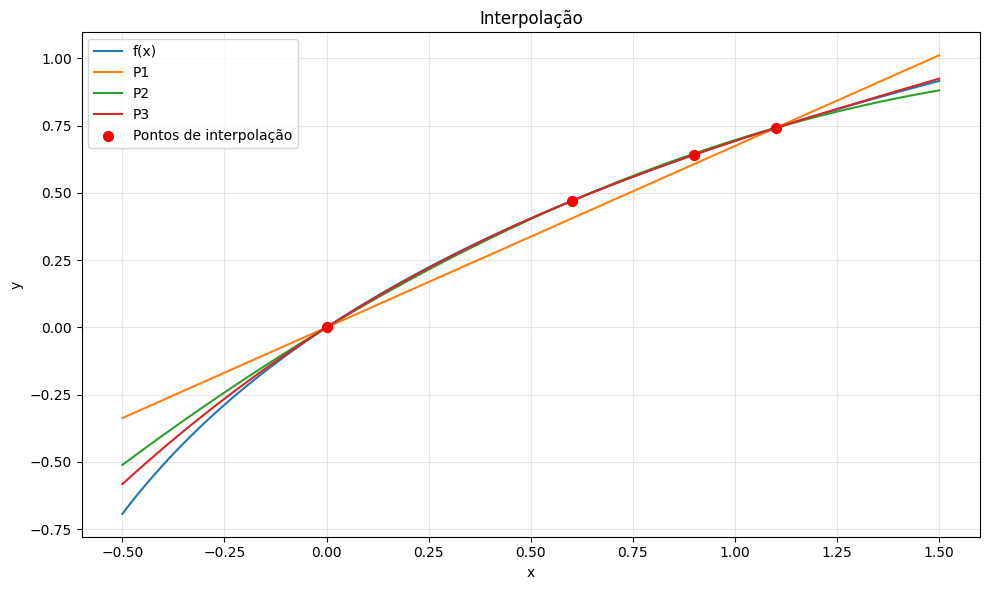

In [4]:
# comportamento da interpolação
plot_interpolacoes(limites=(-0.5, 1.5), pontos_interpolacao=pontos_interpolacao, funcoes=funcoes)

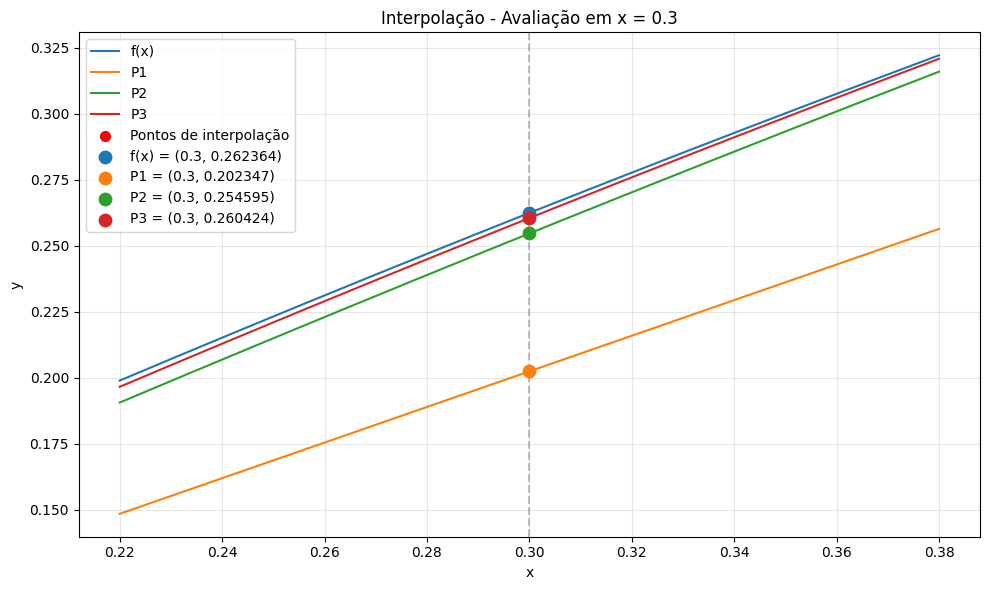

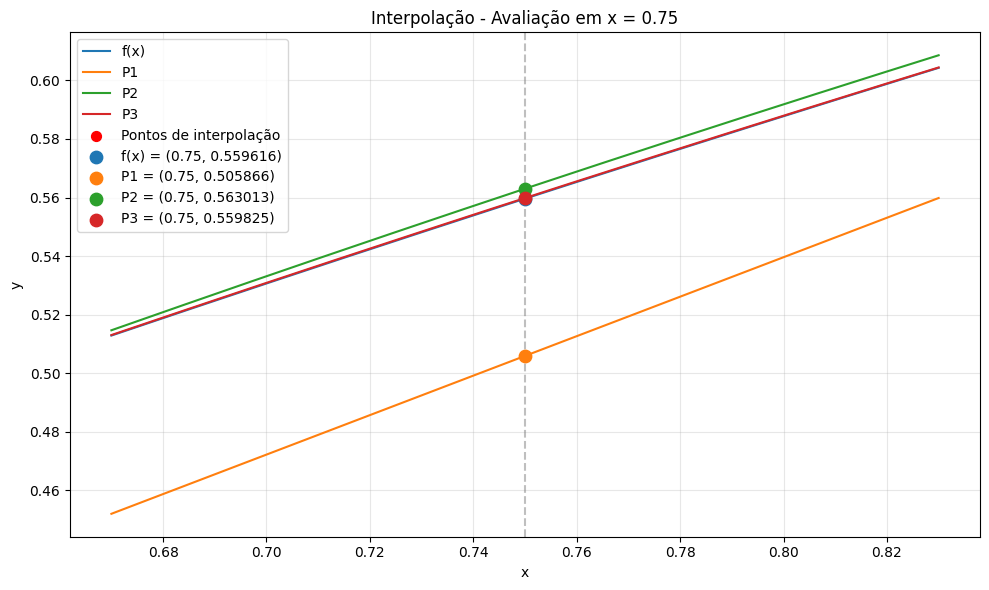

In [5]:
# avaliação em pontos específicos
for ponto in pontos_avaliacao:
    plot_interpolacoes(limites=(ponto-0.08, ponto+0.08), 
                       pontos_interpolacao=pontos_interpolacao, 
                       funcoes=funcoes, 
                       ponto_avaliacao=ponto)